In [15]:
import pandas as pd
WHO_Mortality = pd.ExcelFile(r'C:\Users\saurabh\Documents\Desktop\Data Science projects\Data For Projects\mortality.xls').parse(skiprows=7,skip_footer=(12))
WHO_Mortality=WHO_Mortality[['Unnamed: 2','Unnamed: 5','Unnamed: 6']]
WHO_Mortality.columns=['Country','Life Expectancy at Birth(Male)','Life Expectancy at Birth(Female)']
WHO_Mortality=WHO_Mortality.loc[0:191]
WHO_Mortality.set_index('Country',inplace=True)
WHO_Mortality

,Life Expectancy at Birth(Male),Life Expectancy at Birth(Female)
Country,,
Afghanistan,41.0,42.0
Albania,69.0,75.0
Algeria,69.0,72.0
Andorra,78.0,84.0
Angola,38.0,42.0
...,...,...
Venezuela,71.0,77.0
Viet Nam,68.0,74.0
Yemen,57.0,61.0


In [16]:
mortality=WHO_Mortality.sort_values('Life Expectancy at Birth(Male)',ascending=False)
mortality=mortality.iloc[0:5]
mortality

,Life Expectancy at Birth(Male),Life Expectancy at Birth(Female)
Country,,
Japan,78.0,85.0
Australia,78.0,83.0
Iceland,78.0,82.0
San Marino,78.0,84.0
Singapore,78.0,82.0


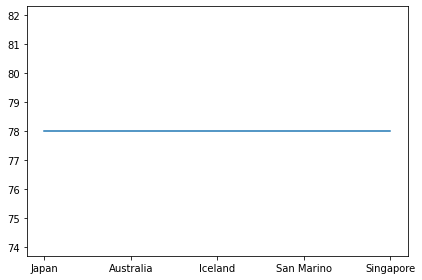

In [17]:
from matplotlib import pyplot as plt 

index=mortality['Life Expectancy at Birth(Male)'].index.values
plt.plot(index,mortality['Life Expectancy at Birth(Male)'])
plt.tight_layout()
plt.show()


In [18]:
WHO_Mortality['Life Expectancy at Birth']=(WHO_Mortality['Life Expectancy at Birth(Male)']+WHO_Mortality['Life Expectancy at Birth(Female)'])/2
bins=[0,40,55,65,75,85,120]
WHO_Mortality['Status']=pd.cut(WHO_Mortality['Life Expectancy at Birth'],bins,labels=['Poor','Average','Good','Very Good','Excellent','Outstanding'],right=False)
WHO_Mortality

,Life Expectancy at Birth(Male),Life Expectancy at Birth(Female),Life Expectancy at Birth,Status
Country,,,,
Afghanistan,41.0,42.0,41.5,Average
Albania,69.0,75.0,72.0,Very Good
Algeria,69.0,72.0,70.5,Very Good
Andorra,78.0,84.0,81.0,Excellent
Angola,38.0,42.0,40.0,Average
...,...,...,...,...
Venezuela,71.0,77.0,74.0,Very Good
Viet Nam,68.0,74.0,71.0,Very Good
Yemen,57.0,61.0,59.0,Good


In [26]:
LiEx=pd.read_csv(r'C:\Users\saurabh\Documents\Desktop\Data Science projects\Data For Projects\Covid-19.csv')
LiEx=LiEx[LiEx['date']=='2020-06-30']
LiEx=LiEx[['location','life_expectancy']]
LiEx.set_index('location',inplace=True)


In [27]:
Updated_WHO_mortality=pd.merge(LiEx,WHO_Mortality,how='inner',left_index=True,right_index=True)
Updated_WHO_mortality

,life_expectancy,Life Expectancy at Birth(Male),Life Expectancy at Birth(Female),Life Expectancy at Birth,Status
Afghanistan,64.83,41.0,42.0,41.5,Average
Albania,78.57,69.0,75.0,72.0,Very Good
Algeria,76.88,69.0,72.0,70.5,Very Good
Andorra,83.73,78.0,84.0,81.0,Excellent
Angola,61.15,38.0,42.0,40.0,Average
...,...,...,...,...,...
Uzbekistan,71.72,63.0,69.0,66.0,Very Good
Venezuela,72.06,71.0,77.0,74.0,Very Good
Yemen,66.12,57.0,61.0,59.0,Good
Zambia,63.89,39.0,39.0,39.0,Poor


In [28]:
Updated_WHO_mortality.drop(columns=['Life Expectancy at Birth(Male)','Life Expectancy at Birth(Female)','Status'],inplace=True)
Updated_WHO_mortality.columns=['Life Expectancy(2020)','Life Expectancy(2002)']
Updated_WHO_mortality

,Life Expectancy(2020),Life Expectancy(2002)
Afghanistan,64.83,41.5
Albania,78.57,72.0
Algeria,76.88,70.5
Andorra,83.73,81.0
Angola,61.15,40.0
...,...,...
Uzbekistan,71.72,66.0
Venezuela,72.06,74.0
Yemen,66.12,59.0
Zambia,63.89,39.0


In [29]:
bins=[20,35,50,65,80,120]
Updated_WHO_mortality['Status']=pd.cut(Updated_WHO_mortality['Life Expectancy(2020)'],bins,labels=['Poor','Average','Good','Very Good','Excellent'],right=False)
Updated_WHO_mortality

,Life Expectancy(2020),Life Expectancy(2002),Status
Afghanistan,64.83,41.5,Good
Albania,78.57,72.0,Very Good
Algeria,76.88,70.5,Very Good
Andorra,83.73,81.0,Excellent
Angola,61.15,40.0,Good
...,...,...,...
Uzbekistan,71.72,66.0,Very Good
Venezuela,72.06,74.0,Very Good
Yemen,66.12,59.0,Very Good
Zambia,63.89,39.0,Good


In [30]:
new_mortality=Updated_WHO_mortality.sort_values('Life Expectancy(2020)',ascending=False)
new_mortality=new_mortality.iloc[0:5]
new_mortality

,Life Expectancy(2020),Life Expectancy(2002),Status
Monaco,86.75,81.5,Excellent
San Marino,84.97,81.0,Excellent
Japan,84.63,81.5,Excellent
Switzerland,83.78,80.5,Excellent
Andorra,83.73,81.0,Excellent


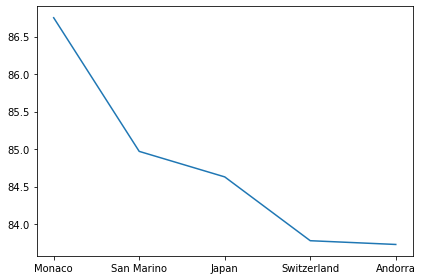

In [31]:
from matplotlib import pyplot as plt 

index1=new_mortality['Life Expectancy(2020)'].index.values
plt.plot(index1,new_mortality['Life Expectancy(2020)'])
plt.tight_layout()
plt.show()


In [25]:
Updated_WHO_mortality['Status'].value_counts()

NameError: name 'Updated_WHO_mortality' is not defined